In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sp
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
df=pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Eda

In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [73]:
df.duplicated().sum()

0

# Visualisation


In [18]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<AxesSubplot:ylabel='State'>

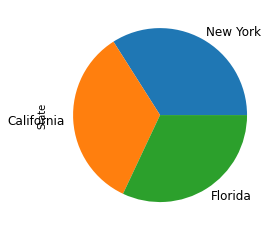

In [36]:
df["State"].value_counts().plot(kind='pie',fontsize=12)

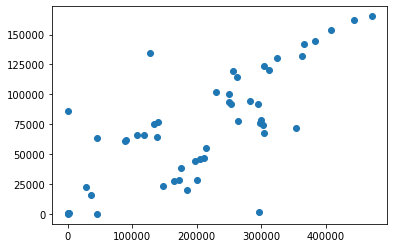

In [30]:
plt.scatter(df["Marketing Spend"],df["R&D Spend"])

<AxesSubplot:>

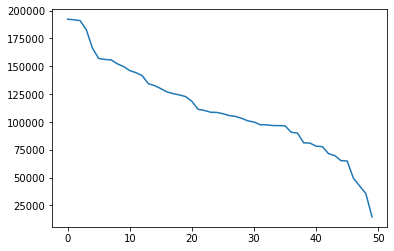

In [22]:
df["Profit"].plot(kind="line")

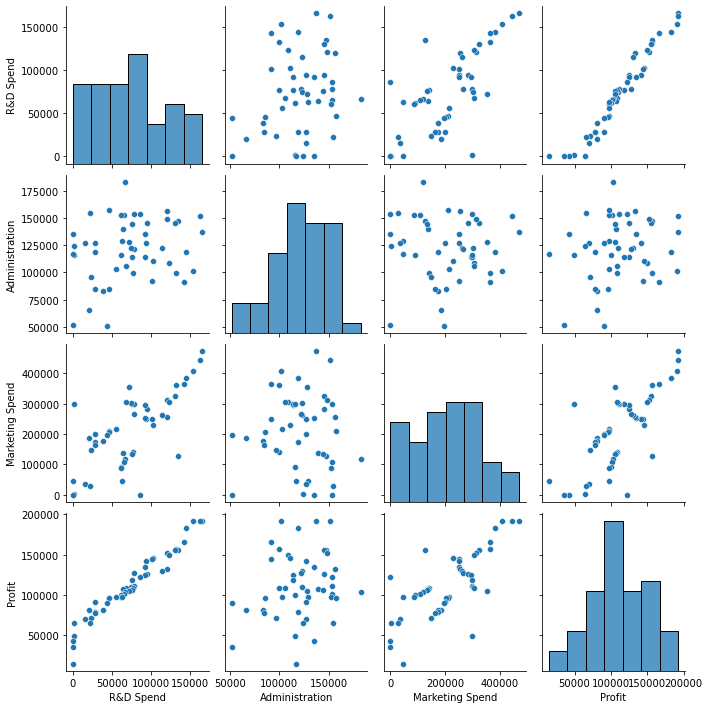

In [6]:
sp.pairplot(df)

# Feature Engineering

# Finding Correlation

In [88]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


<AxesSubplot:>

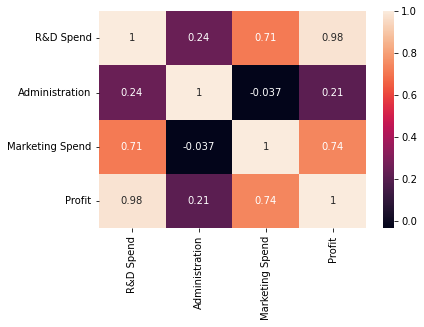

In [89]:
sp.heatmap(df.corr(),annot=True)

In [69]:
x=df.drop(columns =['State', 'Profit' , "Marketing Spend"])

In [90]:
y=df["Profit"]

# Outlier detection and removal

{'whiskers': [<matplotlib.lines.Line2D at 0x1f274092430>,
 'caps': [<matplotlib.lines.Line2D at 0x1f273f92e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f274092190>,
 'medians': [<matplotlib.lines.Line2D at 0x1f273f92190>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f273f924c0>,
 'means': []}

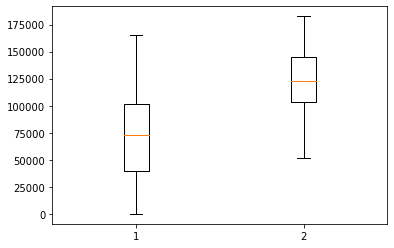

In [70]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f27408cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f2740815b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f27408cd00>],
 'medians': [<matplotlib.lines.Line2D at 0x1f274081b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f274081e20>],
 'means': []}

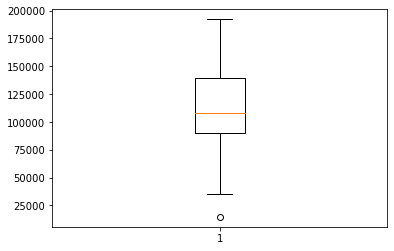

In [74]:
plt.boxplot(y)

In [78]:
df[df["Profit"]<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [84]:
df["Profit"].drop([49], axis=0, inplace=True)

In [86]:
df.drop([49], axis=0, inplace=True)

# Scaling

<AxesSubplot:ylabel='Density'>

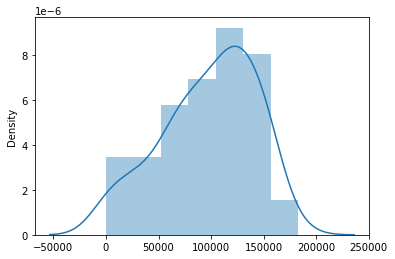

In [80]:
sp.distplot(x)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

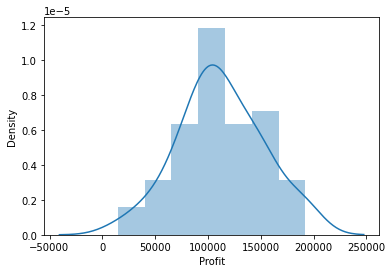

In [81]:
sp.distplot(y)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

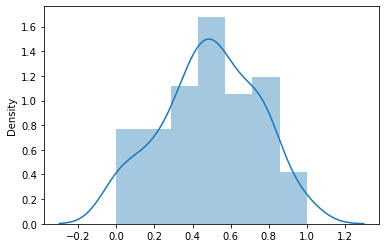

In [65]:
scale=MinMaxScaler()
norm=scale.fit_transform(x,y)
sp.distplot(norm)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

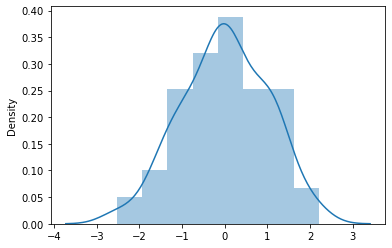

In [102]:
scale=StandardScaler()
stand=scale.fit_transform(x,y)
sp.distplot(stand)

In [113]:
x=norm

In [114]:
y=norm

# Model Building

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [116]:
model=LinearRegression()

In [117]:
model.fit(x_train,y_train)

LinearRegression()

In [118]:
pred=model.predict(x_test)
pred

array([[ 0.4020776 ,  0.51017895],
       [-0.77382036, -1.38312156],
       [-0.25807437, -0.20562866],
       [-1.60035036,  0.10125394],
       [ 0.46072013,  0.85566632],
       [-1.61043334, -2.50940884],
       [ 0.0353702 ,  0.82171792],
       [-0.19931169,  0.65648914],
       [-0.22694868,  0.28392381],
       [ 0.27944165,  1.15983657],
       [ 0.44325987,  0.21544906],
       [ 1.5049372 , -1.07991935],
       [-0.65253231, -2.52599402],
       [ 1.03036886,  0.9869521 ],
       [ 1.55478369, -0.09636463],
       [ 1.34006641,  0.93214721],
       [-1.00853372, -1.32079581]])

# Checking score for train data set

In [119]:
model.score(x_test,y_test)

1.0

# Checking score for test data set

In [120]:
a=model.score(x_train,y_train)
a

1.0

In [121]:
b=model.score(x_test,y_test)
b

1.0

In [122]:
print("the train model score is:",a)
print("the test model score is:",b)

the train model score is: 1.0
the test model score is: 1.0
